# Q1: Binary nearest centroid classifier

#### Implement the Nearest centroid classifier by following these steps:
####  1. Implement a euclidena distance function, given by the following formula:
$dist(\mathbf x, \mathbf y)=\lvert\lvert \mathbf x - \mathbf y \lvert\lvert^{2}$
####  2. Write a class, that represents a Binary nearest centroid classifier, which should contain:
- the init function should take as inputs a distance function(here we are gonna use your written function from task 1)
- a fit function, that takes as input arguments a dataset and the correspodning labels and does the following:
    - save the dataset and the labels separately as class variables(self. etc.)
    - compute the means of both classes and save them as class variables
    - extract the indices of points from each class and save those 2 lists as class variables
- a predict function that takes as input a new datapoint and computes and return the corresponding label, specifically it should do the following:
    - compute the shortest distance to one of the means, which will be the label that we assign to it. 
    - concatenate the old dataset with the new data point and its predict label, respectively
    - recompute the mean class variables
- Use the model to classify the newly provided data point
- make a scatter plot of the new dataset, including the newly classified point. Use the label information to paint the points according to their color



#### 2. Plot the decision boundary for given dataset(Note: decision boundary is where the distance to both centroids is equally large)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apple\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# create synthetic dataset
dog_data = pd.DataFrame(data={'good girl/boy': [2, 2.4, 2.5, 3], 'grumpiness': [.9, .9, 1.2 ,.8]})
cat_data = pd.DataFrame(data={'good girl/boy': [0.10, 0.5, 0.7, 0.2], 'grumpiness': [2, 1.5 ,1.8, 1.7]})
labels = ['dog', 'cat']

X = np.vstack([dog_data, cat_data])
Y = np.concatenate([np.zeros(len(dog_data)), np.ones(len(cat_data))])
np.hstack((Y,np.array([1])))

array([0., 0., 0., 0., 1., 1., 1., 1., 1.])

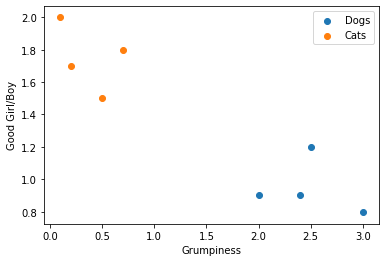

In [3]:
plt.scatter(dog_data['good girl/boy'], dog_data['grumpiness'], label='Dogs')
plt.scatter(cat_data['good girl/boy'], cat_data['grumpiness'], label='Cats')
plt.xlabel('Grumpiness')
plt.ylabel('Good Girl/Boy')
plt.legend()
plt.show()

In [4]:
def euclidean_dist(x, y):
    
    distance = np.dot((x-y).T, x-y)
    
    return distance

In [5]:
class Binary_NC_classifier(object):
    
    def __init__(self, dist_func):
        
        self.dist = dist_func
        
    def fit(self, X, y):
        
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.mean1 = np.mean(self.X[self.y == 1], axis=0)
        self.mean0 = np.mean(self.X[self.y == 0], axis=0)
        self.class1 = np.argwhere(self.y == 1)
        self.class0 = np.argwhere(self.y == 0)
        
    def predict(self, x):
        
        #dist
        x = np.asarray(x)
        dist1 = self.dist(x,self.mean1)
        dist0 = self.dist(x,self.mean0)
        if dist1 > dist0:
            label = np.array([0])
        else:
            label = np.array([1])
        
        #concatenate
        self.X = np.vstack((self.X,x))
        self.y = np.hstack((self.y,label))
        
        #recompute the mean class variables
        self.fit(self.X,self.y)
        
        return label
    
model = Binary_NC_classifier(euclidean_dist)
model.fit(X,Y)

In [6]:
new_point = np.array([1.8, 0.5])

In [7]:
predicted_label = model.predict(new_point)
print(f'Predicted label: {labels[predicted_label[0]]}')

Predicted label: dog


# Q2: Binary breast cancer classification
Following up you'll find a UCI dataset containing samples of healthy patients, and patients that were diagnosed with breast cancer. 
For specific information about the dataset, please visit: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Your goals are to complete the following tasks:

### 1. Parse the data and perform some cleaning:
- Split the labels(='diagnosis') from the rest of the dataset
- Drop the columns: 'id', 'Unnamed: 32':
    - Hint: Check out the pandas function 'drop': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- Convert the labels(=['M', 'B']) to binary ones(=0,1): google for the pandas function:
    - Hint: Use pd.get_dummies()
- split the dataset into training and test set(ratio=80%/20%). Create two new datasets, and keep the original, whole dataset fixed:
    - You may use: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - Don't forget to shuffle the data

### 2. Do some exploration on the whole dataset(training and test set together):
- Plot histogram of radius mean values
    - Hint: Use np.hist() 
- Plot correlation matrix between between every pair of features
    - Hint: Use sns.heatmap(data.corr())
- Look for feature pairs that strongly correlate with each other, and save one of them. Repeat this process until you have found 5 features. Keep those and drop the rest.(remember to do this for both the training dataset and the test dataset) 
    
### 3. Use the sklearn package and train the following algorithms on the dataset:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Apply the following linear models to the dataset:
    - Logisitc regression
    - SVM(linear kernel)
    
- Apply the following non-linear models to the dataset:
    - SVM(rbf kernel)
    - Random Forest
        
- NOTE: Test different hyperparameter settings for the corresponding models and pick the best one.
    
### 4. Compute the confusion matrix and print a classification report for each classifier, which one performs best and why would you say so ?
- Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html, 
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [8]:
data = pd.read_csv('data/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# Parse the data and perform some cleaning
from sklearn.model_selection import train_test_split
diag = data["diagnosis"]
y = pd.get_dummies(diag)["B"]
X = data.drop(columns=["diagnosis","id","Unnamed: 32"])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape

(455, 30)

In [11]:
# Do some exploration on the whole dataset(training and test set together)

plt.((20,20))
sns.heatmap(data.corr())
pltt.show()
# ["area_mean","area_se","texture_worst","area_worst","concave points_worst"]
X_train = X_train.loc[:,["area_mean","area_se","texture_worst","area_worst","concave points_worst"]]
X_test = X_test.loc[:,["area_mean","area_se","texture_worst","area_worst","concave points_worst"]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'plotsize'

In [ ]:
# Use the sklearn package and train the following algorithms on the dataset

In [132]:
# Linear model
# Logisitc regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression().fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        37
           1       1.00      0.90      0.95        77

    accuracy                           0.93       114
   macro avg       0.91      0.95      0.92       114
weighted avg       0.94      0.93      0.93       114



D:\software\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
# SVM(linear kernel)
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77        30
           1       0.99      0.81      0.89        84

    accuracy                           0.85       114
   macro avg       0.81      0.89      0.83       114
weighted avg       0.90      0.85      0.86       114



D:\software\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [142]:
# non-linear
# SVM(rbf kernel)
from sklearn.svm import SVC
clf = SVC(gamma="auto")
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.61      0.75       114

    accuracy                           0.61       114
   macro avg       0.50      0.30      0.38       114
weighted avg       1.00      0.61      0.75       114



D:\software\anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [143]:
# Random Forest
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92        38
           1       1.00      0.91      0.95        76

    accuracy                           0.94       114
   macro avg       0.92      0.95      0.93       114
weighted avg       0.95      0.94      0.94       114



# Q2. Implement cross validation
![Binary classification](resources/crossvalidation.png)
### TODO:
Your first task will be to implement the cross-validation algorithm using a classification algorithm of your choice.
The pseudocode would look something like this:

```python
1. split dataset into training set ant test set
2. loop over a list of hyperparameter settings:
    2.1 split training set into training set and validation set
    2.2 initialize your classification algo. using those hyperparams
    2.3 train your algo. on the training set
    2.4 measure accuracy of your algo on the validation set
    2.5 safe temp. hyperparams if temp accuracy exceeded prior one
3. train the whole training set on the best hyperparameter setting
4. evaluate final accuracy of your algorithm using the test set
```

# Q4: Multiclass sentiment Analysis a la Trump
![Binary classification](resources/trump.jpg)
Goal: Identify and categorize opinions from text data.
---
Following up you'll find a official dataset containing user tweets about the first 2016 GOP Presidential Debate, or as stated by the original source: 
```
We looked through tens of thousands of tweets about the early August GOP debate in Ohio and asked contributors to do both sentiment analysis and data categorization. Contributors were asked if the tweet was relevant, which candidate was mentioned, what subject was mentioned, and then what the sentiment was for a given tweet. We've removed the non-relevant messages from the uploaded dataset.
```
For more information about the data, please follow:
https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment


### Your goals are to complete the following tasks:
---

### 1. Parse the data and perform some exploration first, that is:
- Load and initially explore the dataset located under: 'data/sentiment.csv'
- remove all columns except 'text' and 'sentiment'
- split data into 2 separate datasets, where one contains just negative and one contains the positive tweets(create 2 new datasets instead of deleting the old one)
- remove stop words from tweets(see https://www.nltk.org/book/ch02.html 4.1), as well as hashtags, '@'-signs and 'RT'-sign'
- print a wordcloud for the positive-tweet dataset aswell as the negative tweets dataset. It displays the most appearing words in each dataset. The code for the wordcloud is provided below.
- create a list object, called 'tweets', that contains tuples: (list of words in tweet(cleaned), sentiment('Negative' or 'Positive'))

### 2. Split the data into training and test set(the ratio should be 80% / 20%)
    
    
### 3. Use the nltk library to train a NaiveBayesClassifier on the dataset:
- use nltk.classify.util.apply_features to provide the word features to the classifier(look up docu https://www.nltk.org/api/nltk.classify.html#module-nltk.classify.util)
the needed input argument feature_func input is provided by extract_features function.
- Use: 'classifier = nltk.NaiveBayesClassifier.train(training_set)' to train the classifier, where training_set is the output of the apply_features function

### 4. Use the trained classifier to predict the sentiments of the test set. Plot confusion matrix and print accuracy report like done above

### 5. Provide your own inputs to the classifier and see check whether it is able to classify your intended sentiment.

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

In [148]:
data = pd.read_csv('data/sentiment.csv')
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [157]:
data = data[['text','sentiment']]
data

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
...,...,...
13866,RT @cappy_yarbrough: Love to see men who will ...,Negative
13867,RT @georgehenryw: Who thought Huckabee exceede...,Positive
13868,"RT @Lrihendry: #TedCruz As President, I will a...",Positive
13869,RT @JRehling: #GOPDebate Donald Trump says tha...,Negative


In [163]:
posdata = data[data["sentiment"] == "Positive"]
negdata = data[data["sentiment"] == "Negative"]

In [ ]:
from nltk.tokenize import word_tokenize
def stop_word_remove(sentence):
    filtered_sentence = [word for word in word_list if word \
                      not in stopwords.words('english')]
    

In [152]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

In [153]:
train_pos = # TODO
train_neg = # TODO

test_pos = # TODO
test_neg = # TODO

def wordcloud(cleaned_words, color='black'):
    words = ' '.join(cleaned_words)
    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud(train_pos,'white')
print("Negative words")
wordcloud(train_neg)

SyntaxError: invalid syntax (<ipython-input-153-6df18e08bbf5>, line 1)

In [118]:
# Provided functions
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

# IMPORTANT: USE THIS ONE FOR nltk.classify.apply_features argument input
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [ ]:
# INPUTS

neg_cnt = 0
pos_cnt = 0

for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
        
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neg_cnt, len(test_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt, len(test_pos)))   